In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
from matplotlib import pyplot as plt
import math
from tqdm import tqdm_notebook

In [2]:
X, y = loadlocal_mnist(
        images_path='../train-images-idx3-ubyte', 
        labels_path='../train-labels-idx1-ubyte')


In [3]:
"""print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\n1st row', X[0])
print("first label: ", y[0])"""

'print(\'Dimensions: %s x %s\' % (X.shape[0], X.shape[1]))\nprint(\'\n1st row\', X[0])\nprint("first label: ", y[0])'

In [4]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [5]:
np.savetxt(fname='../train_images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='../train_labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [6]:
X_test, y_test = loadlocal_mnist(
        images_path='../t10k-images-idx3-ubyte', 
        labels_path='../t10k-labels-idx1-ubyte')


In [7]:
"""print('Dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))
print('\n1st row', X_test[0])
print("first label: ", y_test[0])"""

'print(\'Dimensions: %s x %s\' % (X_test.shape[0], X_test.shape[1]))\nprint(\'\n1st row\', X_test[0])\nprint("first label: ", y_test[0])'

## PART 1

### Organizing the training data label-wise

In [8]:
X_0 = X[y==0]
X_1 = X[y==1]
X_2 = X[y==2]
X_3 = X[y==3]
X_4 = X[y==4]
X_5 = X[y==5]
X_6 = X[y==6]
X_7 = X[y==7]
X_8 = X[y==8]
X_9 = X[y==9]

##### Data Sanity Check

In [9]:
class_dist= [X_0.shape[0], X_1.shape[0],X_2.shape[0],X_3.shape[0],X_4.shape[0],X_5.shape[0],X_6.shape[0],X_7.shape[0],X_8.shape[0],X_9.shape[0]]
class_dist==np.bincount(y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
X_seggregated = [X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9]

#### Computing Mean and Standard Deviation Digit

In [11]:
def get_mean_vector_for_class(X_digit):
    mean_vector=[]
    n = X_digit.shape[0]
    for i in range(X_digit.shape[1]):
        mean_vector.append(np.sum(X_digit[:,i],axis=0)/n)
    return(np.array(mean_vector))
    

In [12]:
def get_sd_vector_for_class(X_digit, mean):
    sd_vector=[]
    n = X_digit.shape[0]
    for i in range(X_digit.shape[1]):
        sd_vector.append(np.sum(np.power(X_digit[:,i]-mean[i],2),axis=0)/n)
    return(np.array(sd_vector))

In [13]:
def plot_mean_and_sd_digits(mean_im,sd_im,label):
    f, axarr = plt.subplots(1,2)
    pixels_mean = mean_im.reshape((28, 28))
    pixels_sd = sd_im.reshape((28, 28))
    # Plot
    axarr[0].set_title('Mean digit for {label}'.format(label=label))
    axarr[0].imshow(pixels_mean, cmap='gray')
    axarr[1].set_title('Standard Deviation digit for {label}'.format(label=label))
    axarr[1].imshow(pixels_sd, cmap='gray')

In [14]:
mean_vectors = [get_mean_vector_for_class(x) for x in X_seggregated]

In [15]:
sd_vectors = [get_sd_vector_for_class(x,mean_vectors[i]) for i,x in enumerate(X_seggregated)]

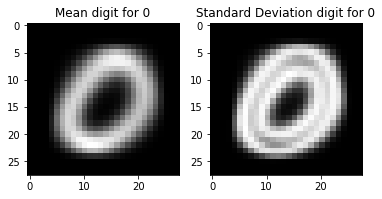

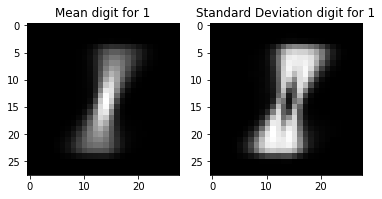

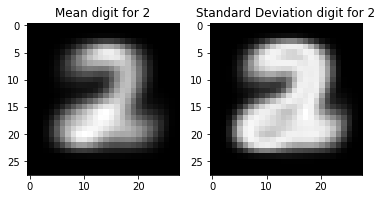

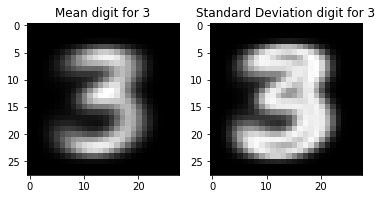

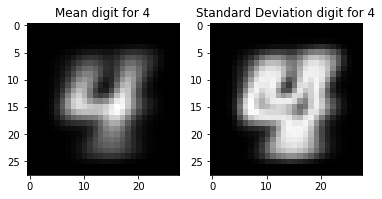

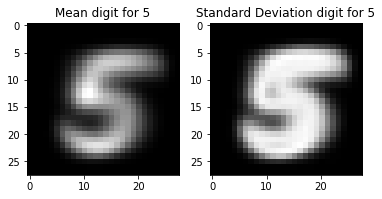

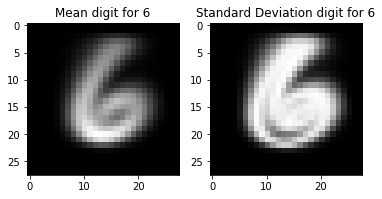

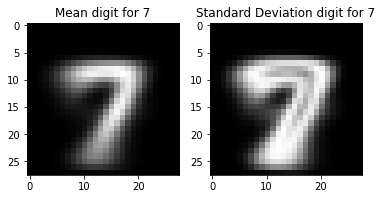

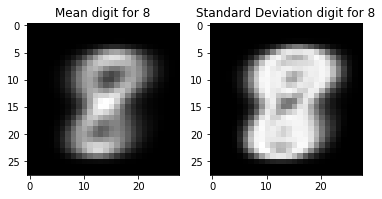

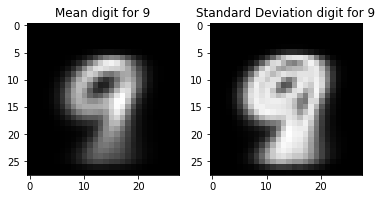

In [16]:
for i,(mean_im,sd_im) in enumerate(zip(mean_vectors,sd_vectors)):
    plot_mean_and_sd_digits(mean_im,sd_im,i)

## PART 2

In [17]:
class bayesian_decision_classifier(object):
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.labels = [i for i in range(10)]
        self.X_segg = self.seggregate_data_by_labels(X,y)
        self.mean_vectors = [self.get_mean_vector_for_class(x) for x in self.X_segg]
        self.sd_vectors = [self.get_sd_vector_for_class(x,self.mean_vectors[i]) for i,x in enumerate(self.X_segg)]
        self.covariance_matrices = [np.diag(np.power(self.sd_vectors[label],2) + 0.001) for label in range(10)]
        self.log_prior_probabilites = [np.log(self.get_prior_proba_for_class(label)) for label in self.labels]
    
    
    def seggregate_data_by_labels(self,X,y):
        X_0 = X[y==0]
        X_1 = X[y==1]
        X_2 = X[y==2]
        X_3 = X[y==3]
        X_4 = X[y==4]
        X_5 = X[y==5]
        X_6 = X[y==6]
        X_7 = X[y==7]
        X_8 = X[y==8]
        X_9 = X[y==9]
        
        return [X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9]
        #return np.array([self.X[self.y==label] for label in self.labels])

    def get_mean_vector_for_class(self,X_digit):
        mean_vector=[]
        n = X_digit.shape[0]
        for i in range(X_digit.shape[1]):
            mean_vector.append(np.sum(X_digit[:,i],axis=0)/n)
        return(np.array(mean_vector))

    def get_sd_vector_for_class(self,X_digit, mean):
        sd_vector=[]
        n = X_digit.shape[0]
        for i in range(X_digit.shape[1]):
            sd_vector.append(np.sum(np.power(X_digit[:,i]-mean[i],2),axis=0)/n)
        return(np.array(sd_vector))
    
    def get_likelihood_for_class(self,X_in,label):
        PI = 3.14
        covariance_matrix = self.covariance_matrices[label] 
        assert covariance_matrix.shape == (784,784)
        assert self.mean_vectors[label].shape == (784,)
        assert X_in.shape[1] == 784
        
        diff_from_mean = X_in - (self.mean_vectors[label]).reshape(1,self.X.shape[1])
        assert diff_from_mean.shape == (10000,784)
        
        mult_matrix = np.dot(np.dot(diff_from_mean,np.linalg.pinv(covariance_matrix)),np.transpose(diff_from_mean))
        assert mult_matrix.shape == (10000,10000)
        
        mult_term = np.diag(mult_matrix)
        assert mult_term.shape == (10000,)
        
        
        exponential_term = (-1/2)*(mult_term)
        sign,logdet = np.linalg.slogdet(covariance_matrix)
        # ToDo: Check with sign here:
        determinant_term = (-1/2)* sign*logdet      
        denominator_term = (-1/2)*self.X.shape[1]*np.log(2*PI)   
        final_vector = exponential_term+denominator_term+self.log_prior_probabilites[label]#+determinant_term ##np.array([self.log_prior_probabilites[label]]*10000)#
        assert final_vector.shape == (10000,)
        return(final_vector)
        
    
    def get_prior_proba_for_class(self,label):
        return (self.y==label).sum()/y.shape[0]    # USE MEAN HERE.
    
    def classify(self,test_X):
        predicted_probabilities = self.get_likelihood_for_class(test_X, 0).reshape(10000,1)
        print(predicted_probabilities.shape)
        for label in tqdm_notebook(range(1,10)):
            predicted_probabilities = np.append(predicted_probabilities,self.get_likelihood_for_class(test_X, label).reshape(10000,1),axis=1)
            #print('shape:',(self.get_likelihood_for_class(test_X, label)).shape)
            #predicted_probabilities[:,i] = self.get_likelihood_for_class(test_X, label)
            #predicted_probabilities = np.hstack(predicted_probabilities)
            print('predicted_probabilities shape:',predicted_probabilities.shape)
        """for probability_vector in predicted_probabilities:
            y_predicted.append(np.argmax(probability_vector))
        return np.array(y_predicted)"""
        print(predicted_probabilities[0])
        return np.argmax(predicted_probabilities,1)

In [18]:
clf = bayesian_decision_classifier(X,y)

In [19]:
predictions = clf.classify(X_test)

(10000, 1)


predicted_probabilities shape: (10000, 2)
predicted_probabilities shape: (10000, 3)
predicted_probabilities shape: (10000, 4)
predicted_probabilities shape: (10000, 5)
predicted_probabilities shape: (10000, 6)
predicted_probabilities shape: (10000, 7)
predicted_probabilities shape: (10000, 8)
predicted_probabilities shape: (10000, 9)
predicted_probabilities shape: (10000, 10)

[-6.11657381e+07 -2.20629202e+07 -6.11658091e+07 -7.61081729e+02
 -7.40794992e+02 -7.27356649e+02 -7.83405141e+07 -7.22532620e+02
 -7.90820908e+02 -7.22713772e+02]


In [20]:
predictions[0]

7

In [21]:
(y_test == predictions).mean()

0.6514

In [22]:
y_test[0]

7

In [23]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])